# 2) 스케일링

<Axes: >

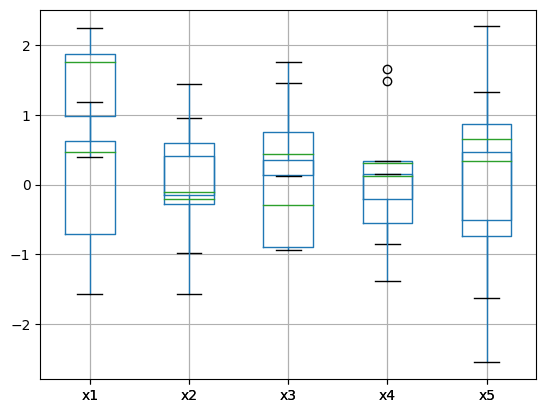

In [2]:
from patsy import demo_data
import pandas as pd
#임의의 실수형 데이터
df = pd.DataFrame(demo_data("x1", "x2", "x3", "x4", "x5"))
df
df.boxplot()
from sklearn.preprocessing import StandardScaler
#평균 0, 표준편차 1이 되도록 스케일링
scaler = StandardScaler()
df2=scaler.fit_transform(df)
df3=pd.DataFrame(df2, columns=df.columns)
df3
df3.boxplot()


In [3]:
import numpy as np
X = np.arange(7).reshape(7, 1) #7행 1열로 변환
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [4]:
from sklearn.preprocessing import StandardScaler
#평균 0, 표준편차 1이 되도록 스케일링
scaler = StandardScaler()
X2=scaler.fit_transform(X)
X2

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

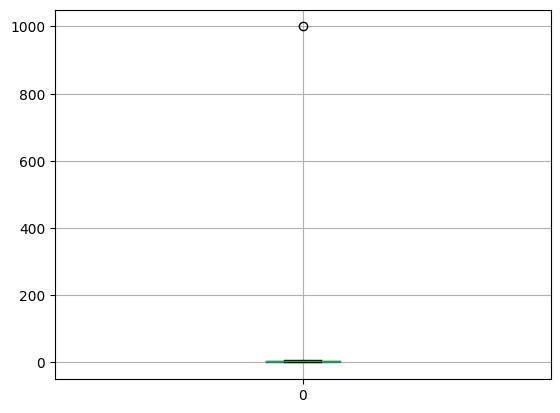

In [5]:
# 이상치(outlier)가 존재할 경우
X2 = np.vstack([X, [[1000]]]) #배열을 세로로 쌓는 함수
X2
import matplotlib.pyplot as plt
pd.DataFrame(X2).boxplot()
plt.show()

In [7]:
#아웃라이어가 존재할 경우 스케일링을 했을 때 0에 수렴하지 않고 멀어지는 현상이 발생할 수 있다.
#이것은 기계학습 모형의 예측력을 떨어뜨릴 수 있는 요인이 될 수 있다.
scaler.fit_transform(X2)

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

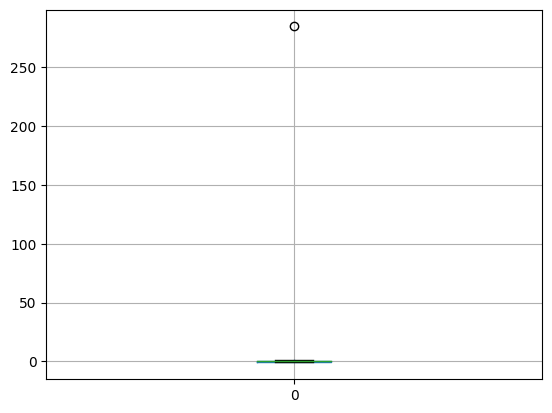

In [8]:
#이상치가 많은 데이터의 경우 RobustScaler를 사용한다.
#중앙값 0, IQR(InterQuartile Range)이 1이 되도록 변환하므로 아웃라이어가 있어도
# 대부분의 데이터가 0 주위로 모이게 된다.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X3=scaler.fit_transform(X2)
X3
import matplotlib.pyplot as plt
pd.DataFrame(X3).boxplot()
plt.show() # 1000 => 300으로 감소